In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns


In [356]:
df=pd.read_csv('KNN_project_data')

In [357]:
df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [358]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [359]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

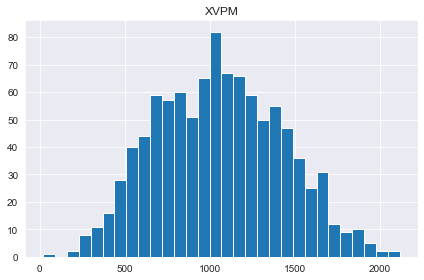

In [360]:
df.hist(column='XVPM',bins=30)
plt.tight_layout()

C:\Users\KIIT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\KIIT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\KIIT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\KIIT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


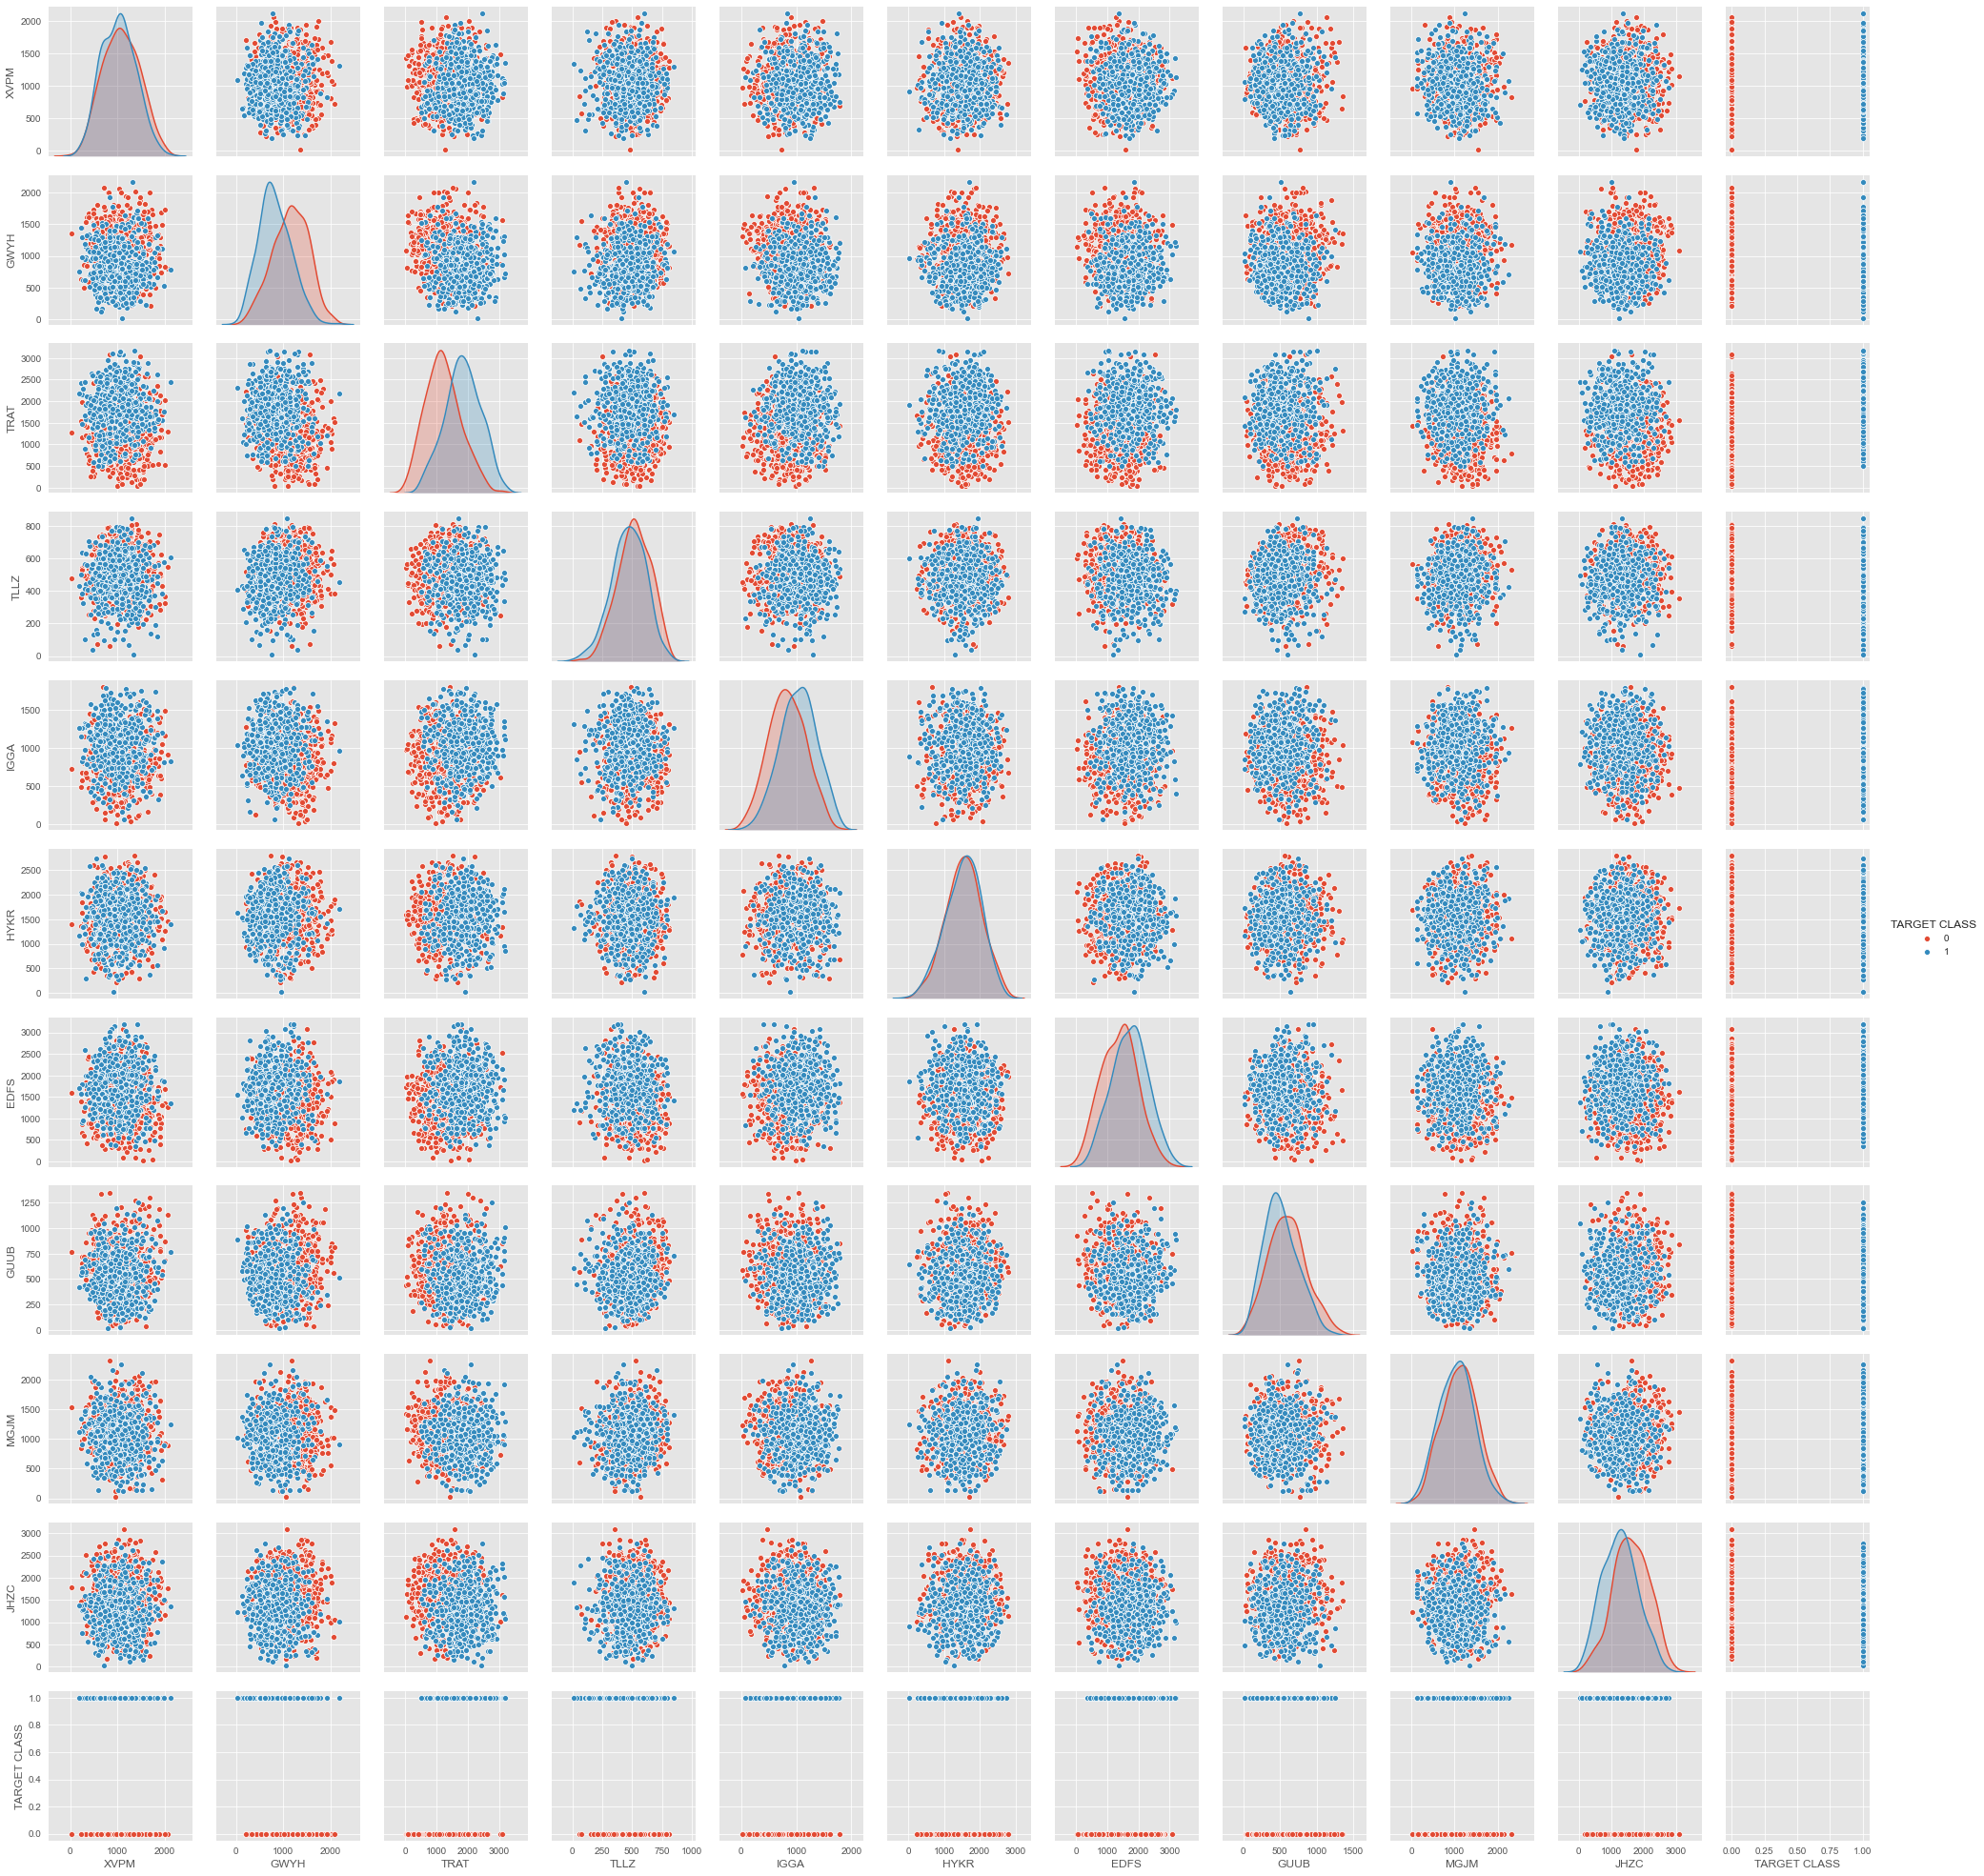

In [386]:
sns.pairplot(data=df,hue='TARGET CLASS')

In [361]:
p=df['XVPM'].value_counts()

In [362]:
p

1646.547528    1
1440.147015    1
1104.657713    1
1384.198404    1
856.255438     1
              ..
1045.874430    1
1943.171110    1
828.451250     1
1154.342490    1
792.015189     1
Name: XVPM, Length: 1000, dtype: int64

In [363]:
X=df.drop('TARGET CLASS',axis=1)

In [364]:
X

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792
...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020


In [365]:
y=df['TARGET CLASS']

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
from sklearn.preprocessing import StandardScaler

In [368]:
X=StandardScaler().fit(X).transform(X.astype(float))

In [369]:
X

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [370]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('size of train set',X_train.shape,y_train.shape)
print('size of test set',X_test.shape,y_test.shape)

size of train set (800, 10) (800,)
size of test set (200, 10) (200,)


In [371]:
from sklearn.neighbors import KNeighborsClassifier

In [372]:
k=4
model=KNeighborsClassifier(n_neighbors=k)

In [373]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [374]:
pred=model.predict(X_test)

In [375]:
pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [393]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [394]:
print("out sample accuracy",accuracy_score(pred,y_test))
print("in sample accuracy",accuracy_score(y_train,model.predict(X_train)))

out sample accuracy 0.775
in sample accuracy 0.87


In [395]:
confusion_matrix(pred,y_test)

array([[77, 13],
       [32, 78]], dtype=int64)

In [396]:
f1_score(pred,y_test)

0.7761194029850746

In [397]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
k_val=40
mean_acc=np.zeros((k_val-1))
for n in range(1,k_val):
    model1=KNeighborsClassifier(n_neighbors=n)
    model1.fit(X_train,y_train)
    pred=model1.predict(X_test)
    mean_acc[n-1]=accuracy_score(pred,y_test)


mean_acc    

array([0.725, 0.74 , 0.76 , 0.765, 0.77 , 0.79 , 0.76 , 0.785, 0.805,
       0.8  , 0.775, 0.815, 0.775, 0.795, 0.78 , 0.805, 0.785, 0.8  ,
       0.775, 0.785, 0.79 , 0.8  , 0.775, 0.785, 0.78 , 0.775, 0.77 ,
       0.78 , 0.775, 0.795, 0.77 , 0.785, 0.78 , 0.79 , 0.78 , 0.79 ,
       0.78 , 0.79 , 0.795])

In [398]:
p=np.arange(1,k_val)

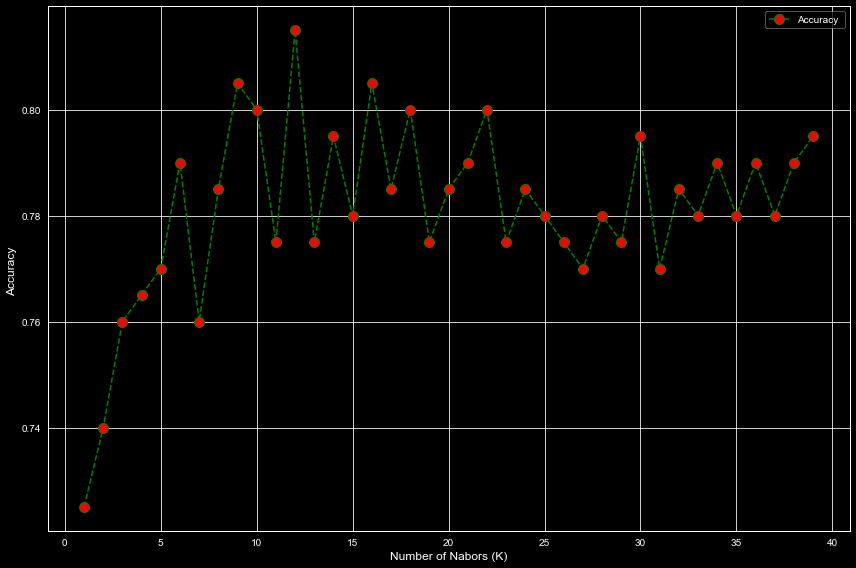

In [399]:
plt.style.use('ggplot')
with plt.style.context('dark_background'):
    plt.figure(figsize=(12,8))
    plt.plot(p,mean_acc,marker='o', markerfacecolor='red', linestyle='dashed', color='green', markersize=10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
plt.show()

In [400]:
print("best accuracy is",mean_acc.max(),'for k value=',mean_acc.argmax())

best accuracy is 0.815 for k value= 11


In [401]:
model1=KNeighborsClassifier(n_neighbors=11)
model1.fit(X_train,y_train)
pred=model1.predict(X_test)


In [402]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        90
           1       0.86      0.71      0.78       110

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.79      0.78      0.78       200

